<a href="https://colab.research.google.com/github/MarvinLopezOsorio/AnaliticaPredictiva_TrabajoFinal/blob/Marvin/Trabajo%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

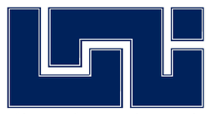

</center>


<center><h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks</center>

[UNI-DEPEC](https://posgrado.uni.edu.ni)

**Estudiantes:** 

*   Marvin López Osorio
*   Eduardo Rivera

# **Trabajo Final**
## **Modelo de Clasificación: Análisis y desarrollo de modelo de clasificación de no aprobación de estudiantes de primer ciclo universitario utilizando Python**
Se desarrolló un modelo de aprendizaje automático de tipo clasificación para predecir el resultado de aprobación de estudiantes en el primer ciclo universitario. 

El estudio se basó en un conjunto de datos generales, encuestas de hábitos de estudio y resultados de análisis psicopedagógicos de los estudiantes del primer ciclo de carreras de ingeniería en una universidad de El Salvador. 

Se confirmaron hipótesis respecto a las relaciones entre las variables involucradas, y a la vez se encontraron correspondencias no previstas entre las variables de estudio.

Se creo un [repositorio en GitHub](https://github.com/MarvinLopezOsorio/AnaliticaPredictiva_TrabajoFinal) donde se almacena la base de datos y el presente cuaderno para consultas futuras.

## **Objetivo**
Predecir si un estudiante reprobará el primer ciclo universitario mediante un modelo de clasificación basado en variables psicopedagógicas, conductuales (malos hábitos) y generales.

## **Antecedentes**
Una universidad de El Salvador desde el año 2013 se planteó el problema de cómo dar acompañamiento a los estudiantes con el objetivo de reducir la deserción en los primeros años de carreras universitarias.


Con la cantidad de estudiantes cercana a siete mil, en el año 2013, se tomaron algunas decisiones:
*   Aplicar una prueba psicométrica para identificar aptitudes y hábitos en los estudiantes de nuevo ingreso.
*   Crear departamento de psicopedagogía que aplicara la prueba y apoyara a los estudiantes, aconsejándoles con base en sus aptitudes.
*   Crear programas de apoyo a los estudiantes para mejorar sus aptitudes.

En base a lo anterior, se creó en el 2014 el departamento 
de psicopedagogía y a partir del 2015 se empezó a aplicar dicha prueba para iniciar una base de datos que sirviera de insumo para crear los programas de apoyo a estudiantes de la universidad.

En 2016, se inició a trabajar en la posibilidad de identificar a los estudiantes que necesitaran mayor orientación para seleccionar la carrera que cursarían y tener éxito en la misma. A partir esta iniciativa, se tomarían decisiones de creación de programas de apoyo y orientación estudiantil para reducir la tasa de deserción que en ese año rondó el 20%.

Se obtuvo de parte del departamento de psicopedagogía una base de datos que contiene datos de 41 carreras, con ingresos de estudiantes entre 2017 y 2021 y las variables psicopedagógicas relevantes.

##**Desarrollo**

###**Descripción de los datos obtenidos**


####****Carga de librerías necesarias****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

####****Carga de datos****

In [2]:
#Referencias al archivo en repositorio de origen y carga de datos
repo = 'https://github.com/MarvinLopezOsorio/AnaliticaPredictiva_TrabajoFinal/blob/main/Base%20de%20Datos%20Universidad.xlsx?raw=True'
datos = pd.read_excel(repo)
datos.head(3)

,Ingreso,Estado,Sexo,Municipio,Edad,Paes,Carrera,Facultad,Segunda carrera,CUM,Porcentaje de avance,Estado actual,Razonamiento Verbal (DAT- VR),Relaciones Espaciales (DAT - SR),Razonamiento Abstracto (DAT- AR),Aptitud Numérica (DAT - NA),Razonamiento Mecánico (DAT-MR),Rapidez y precisión perceptiva (DAT -CSA),Hábitos,Aprobación,tipo institución
0,2017,ACTIVO,Femenino,Soyapango,23,5.52,Licenciatura en Idiomas con especialidad en la...,Facultad de CC. y Humanidades,NaN,8.4,77.14,ACTIVO,75,15,20,5,45,5,5,Aprobado,Privado
1,2017,ACTIVO,Femenino,Soyapango,23,4.50,Licenciatura en Ciencias de la Comunicación,Facultad de CC. y Humanidades,NaN,8.6,94.00,ACTIVO,75,20,15,50,15,5,1,Aprobado,Privado
2,2017,ACTIVO,Femenino,Soyapango,24,3.83,Licenciatura en Idiomas con especialidad en Tu...,Facultad de CC. y Humanidades,NaN,7.6,79.41,ACTIVO,45,5,10,30,15,5,4,Aprobado,Público


El dataset original continene las siguientes variables:

*   Ingreso, 
*   Estado,
*   Sexo, 
*   Municipio, 
*   Edad, 
*   Paes, 
*   Carrera,
*   Facultad, 
*   Segunda carrera, 
*   CUM, 
*   Porcentaje de avance,
*   Estado actual, 
*   Razonamiento Verbal (DAT- VR),
*   Relaciones Espaciales (DAT - SR), 
*   Razonamiento Abstracto (DAT- AR),
*   Aptitud Numérica (DAT - NA), 
*   Razonamiento Mecánico (DAT-MR),
*   Rapidez y precisión perceptiva (DAT -CSA), 
*   Hábitos, 
*   Aprobación,
*   tipo institución

Se realizaron cambios a los nombres para que facilitar el manejo del dataset.


In [3]:
Columnas = ['Ingreso', 'Estado', 'Sexo', 'Municipio', 'Edad', 'Paes', 'Carrera', 'Facultad', 'Segunda_carrera', 'CUM', 'Avance', 
            'Estado_actual', 'DAT_VR', 'DAT_SR', 'DAT_AR', 'DAT_NA', 'DAT_MR', 'DAT_CSA', 'Hábitos', 'Aprobacion', 'Institucion']
datos.columns = Columnas

El problema de estudio puede ser abordado como una regresión sobre la variable 'CUM', o como clasificación sobre la variable 'Aprobacion'. En este caso se consideró conveniente realizar clasificación sobre 'Aprobacion', ya que el objetivo principal de la institución es identificar aquellos estudiantes que puedan tener deficiencias, y buscar corregirlas, independientemente de la nota que puedan obtener.

Por otra parte, para evitar redundancia, se puede descartar la variable Estado, debido a la situación más reciente dada por Estado_actual.

Es plausible considerar que las variables 'Carrera' y 'Facultad' pueden ser redundantes, sin embargo, se decidió dejarlas presentes en el desarrollo del modelo, ya que una facultad engloba varias carreras y en algunas carreras se tienen muy pocas observaciones, podría ser relevante dejar ambas.


In [4]:
datos.drop(columns=['Estado', 'CUM'])
datos.head(3)

,Ingreso,Estado,Sexo,Municipio,Edad,Paes,Carrera,Facultad,Segunda_carrera,CUM,Avance,Estado_actual,DAT_VR,DAT_SR,DAT_AR,DAT_NA,DAT_MR,DAT_CSA,Hábitos,Aprobacion,Institucion
0,2017,ACTIVO,Femenino,Soyapango,23,5.52,Licenciatura en Idiomas con especialidad en la...,Facultad de CC. y Humanidades,NaN,8.4,77.14,ACTIVO,75,15,20,5,45,5,5,Aprobado,Privado
1,2017,ACTIVO,Femenino,Soyapango,23,4.50,Licenciatura en Ciencias de la Comunicación,Facultad de CC. y Humanidades,NaN,8.6,94.00,ACTIVO,75,20,15,50,15,5,1,Aprobado,Privado
2,2017,ACTIVO,Femenino,Soyapango,24,3.83,Licenciatura en Idiomas con especialidad en Tu...,Facultad de CC. y Humanidades,NaN,7.6,79.41,ACTIVO,45,5,10,30,15,5,4,Aprobado,Público


###**Tipos de datos**

In [5]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ingreso          5992 non-null   int64  
 1   Estado           5992 non-null   object 
 2   Sexo             5992 non-null   object 
 3   Municipio        5992 non-null   object 
 4   Edad             5992 non-null   int64  
 5   Paes             5992 non-null   float64
 6   Carrera          5992 non-null   object 
 7   Facultad         5992 non-null   object 
 8   Segunda_carrera  792 non-null    object 
 9   CUM              5992 non-null   float64
 10  Avance           5992 non-null   float64
 11  Estado_actual    5992 non-null   object 
 12  DAT_VR           5992 non-null   int64  
 13  DAT_SR           5992 non-null   int64  
 14  DAT_AR           5992 non-null   int64  
 15  DAT_NA           5992 non-null   int64  
 16  DAT_MR           5992 non-null   int64  
 17  DAT_CSA       

In [6]:
datos.shape

(5992, 21)

Se tienen 5992 observaciones, con 21 variables, y estas observaciones se han obtenido entre el año 2017 y 2021

In [7]:
datos.size

125832

In [8]:
datos.isna().sum().sort_values() 


Ingreso               0
Hábitos               0
DAT_CSA               0
DAT_MR                0
DAT_NA                0
DAT_AR                0
DAT_SR                0
DAT_VR                0
Estado_actual         0
Aprobacion            0
Avance                0
Facultad              0
Carrera               0
Paes                  0
Edad                  0
Municipio             0
Sexo                  0
Estado                0
CUM                   0
Institucion           0
Segunda_carrera    5200
dtype: int64

Existe una variable llamada "Segunda carrera", la cuál no es relevante, ya que la mayoría de los estudiantes no completan esta parte, y como puede verse 5200 de las observaciones tienen valor ausente. 
Se procede a eliminar dicha columna del dataframe

In [9]:
datos=datos.drop(columns=['Segunda_carrera'])

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5992 entries, 0 to 5991
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ingreso        5992 non-null   int64  
 1   Estado         5992 non-null   object 
 2   Sexo           5992 non-null   object 
 3   Municipio      5992 non-null   object 
 4   Edad           5992 non-null   int64  
 5   Paes           5992 non-null   float64
 6   Carrera        5992 non-null   object 
 7   Facultad       5992 non-null   object 
 8   CUM            5992 non-null   float64
 9   Avance         5992 non-null   float64
 10  Estado_actual  5992 non-null   object 
 11  DAT_VR         5992 non-null   int64  
 12  DAT_SR         5992 non-null   int64  
 13  DAT_AR         5992 non-null   int64  
 14  DAT_NA         5992 non-null   int64  
 15  DAT_MR         5992 non-null   int64  
 16  DAT_CSA        5992 non-null   int64  
 17  Hábitos        5992 non-null   int64  
 18  Aprobaci

Se verifica la variable objetivo con un Histograma

In [11]:
import plotly.express as px
import plotly.figure_factory as ff

In [12]:
fig = px.histogram(datos, x = datos.Aprobacion,
                   title="Distribución variable objetivo", 
                   color_discrete_sequence = ["red"], # color 
                   marginal="rug")
fig.show()

Se tiene más Aprobados que Reprobados, y es cercano al doble

##**Conclusiones**

###**División del dataframe**
Se realizaron 2 separaciones del dataset. La primera, equivalente a 1% del tamaño original de los datos, con el objetivo de reservar datos no vistos por el algoritmo a elaborar, y realizar una validación 'en producción' con datos completamente nuevos. 

La segunda división, basada en el 99% de los datos originales, se realizó para crear los nuevos dataset para entrenamiento (75%) y prueba (25%).

In [13]:
#Separacion de dataset en x/y
y = datos['Aprobacion']
x = datos.drop(columns='Aprobacion')

#Importar funcion requerida
from sklearn.model_selection import train_test_split

#Dividir dataset en datos para el modelo y datos para la validacion posterior 
x_model, x_validation, y_model, y_validation = train_test_split(x, y, test_size = 0.01, random_state = 10)

x_train, x_test, y_train, y_test = train_test_split(x_model, y_model, test_size = 0.25, random_state = 0)

Debido a lo comentado anteriormente, la estructura de los dataset divididos es la mostrada a continuación, en la que el set de validacion corresponde al 1% de la muestra original (60 observaciones) y los subgrupos de entrenamiento y prueba corresponden al 75% (4449 observaciones) y 25% (1483 observaciones) del 99% restante de la primera división, respectivamente:

In [14]:
x_validation.shape

(60, 19)

In [15]:
y_validation.shape

(60,)

In [16]:
x_train.shape

(4449, 19)

In [17]:
x_test.shape

(1483, 19)

In [18]:
y_train.shape

(4449,)

In [19]:
y_test.shape

(1483,)

###**Preprocesamiento**
Se hace necesario realizar transformaciones al dataset dependiendo del tipo de dato de cada variable. Se implementa una estandarización con StandardScaler sobre las variables numéricas normales, normalización con MinMaxScaler sobre las variables numéricas no normales y One-Hot encoding de las variables categóricas.

In [20]:
#Importar clases necesarias
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [21]:
#Separacion de columnas categoricas, normales y no normales
cat_cols = x.select_dtypes(include="object").columns.to_list()
norm_cols = x.select_dtypes(include="int64").columns.to_list()
nonorm_cols = x.select_dtypes(include="float64").columns.to_list()

In [22]:
#Implementación de transformer
Transformer = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown="ignore", sparse=False), cat_cols),
                                 ('standardizer', StandardScaler(), norm_cols),
                                 ('normalizer', MinMaxScaler(), nonorm_cols)],
                                remainder = 'passthrough')

In [23]:
#Aplicando transformer a los datasets de train y test
Transformer.fit(x_train)
x_train_trans = Transformer.transform(x_train)
x_test_trans = Transformer.transform(x_test)

In [24]:
#Se obtienen las etiquetas de columnas para crear el dataframe
labels = Transformer.get_feature_names_out()

In [25]:
#Se conforman los dataframe una vez transformados
x_train_trans = pd.DataFrame(x_train_trans,columns = labels)
x_test_trans = pd.DataFrame(x_test_trans,columns = labels)

###**Creación del modelo**
Se genera una instancia del algoritmo de arbol de decisión, se crea el modelo y se configura utilizando los hiperpárametros por defecto. 

El ajuste del modelo se realiza tomando en cuenta la Aprobacion como variable objetivo, y el resto de variables procesadas con el Transformer, como vector de entrada.

Después, se aplica el proceso de pruning y se comparan los resultados frente al modelo inicial.

Adicional, se realizan modificaciones a hiperparámetros para verificar los cambios en el desempeño del modelo.

In [36]:
#Importar la clase del modelo
from sklearn.tree import DecisionTreeClassifier

#Instanciar el modelo y ajustar con los datos de entrenamiento
modelo = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=10)
modelo.fit(x_train_trans, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=100)

In [37]:
y_pred = modelo.predict(x_test_trans)

###**Evaluación del modelo**
Se genera una instancia del algoritmo de arbol de decisión, se crea el modelo y se configura utilizando los hiperpárametros por defecto. 


In [30]:
import sklearn.metrics as metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



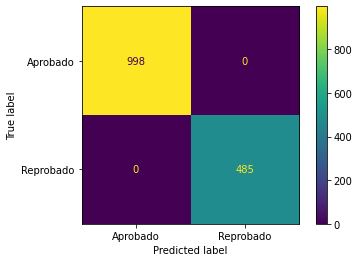

In [38]:
metrics.plot_confusion_matrix(modelo,x_test_trans, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



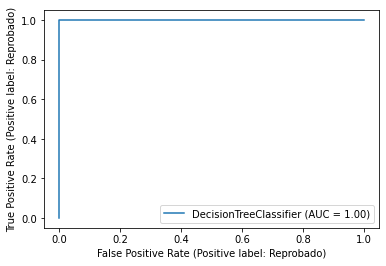

In [34]:
metrics.plot_roc_curve(modelo, x_test_trans, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



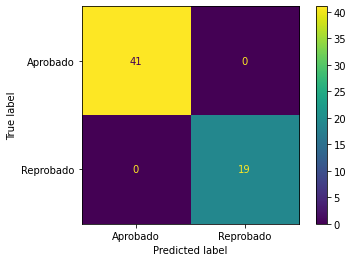

In [39]:
x_validation_trans = Transformer.transform(x_validation)
y_pred_val = modelo.predict(x_validation_trans)
metrics.plot_confusion_matrix(modelo,x_validation_trans, y_validation)

In [44]:
from scipy import stats
num_cols = datos.select_dtypes(include=["int64","float64"]).columns.to_list()

for i in num_cols:
  result = stats.anderson(datos[i])
  print(i)
  print('Statistic: %.3f' % result.statistic)
  p = 0
  for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
      print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
      print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Ingreso
Statistic: 219.061
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
Edad
Statistic: 325.587
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
Paes
Statistic: 359.107
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.786, data does not look normal (reject H0)
2.500: 0.917, data does not look normal (reject H0)
1.000: 1.091, data does not look normal (reject H0)
CUM
Statistic: 502.345
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.7